**Data Science Project**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
# Load the dataset
data = pd.read_csv('/content/train.csv')

print(data.head())
print(data.info())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [ ]:
# Select relevant features
data = data[['Survived', 'Pclass', 'Age', 'Sex', 'SibSp', 'Parch']]

# Handle missing values by dropping rows with NaN values
data.dropna(inplace=True)

data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
print(data.head())

Empty DataFrame
Columns: [Survived, Pclass, Age, Sex, SibSp, Parch]
Index: []


<ipython-input-18-2897240a640f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


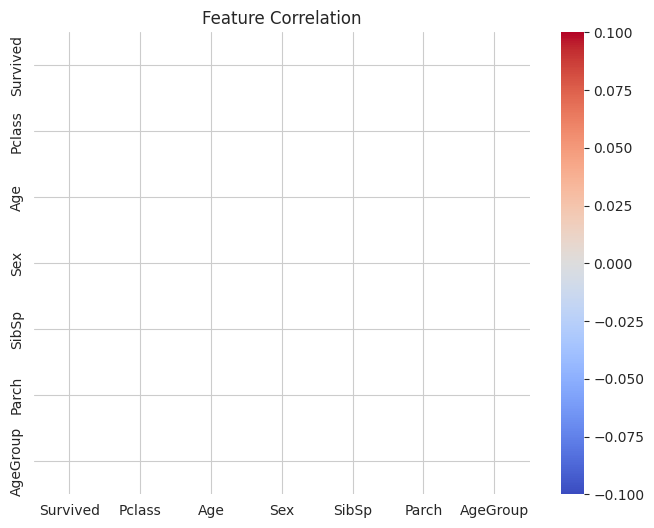

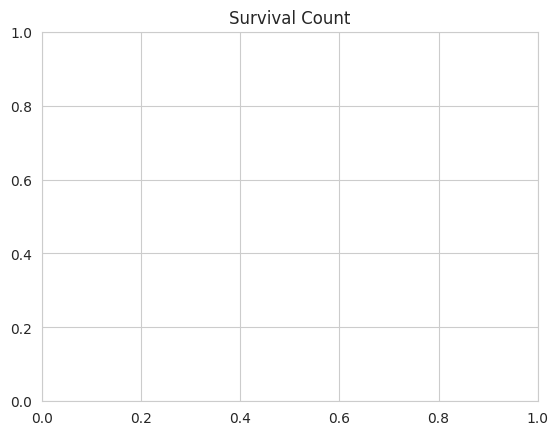

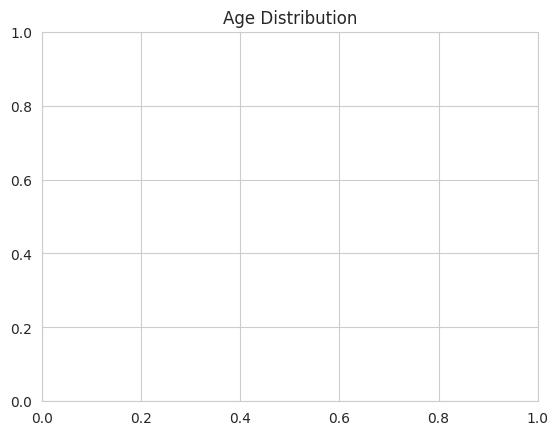

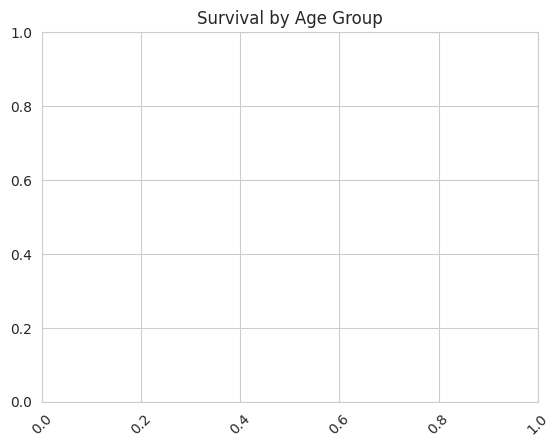

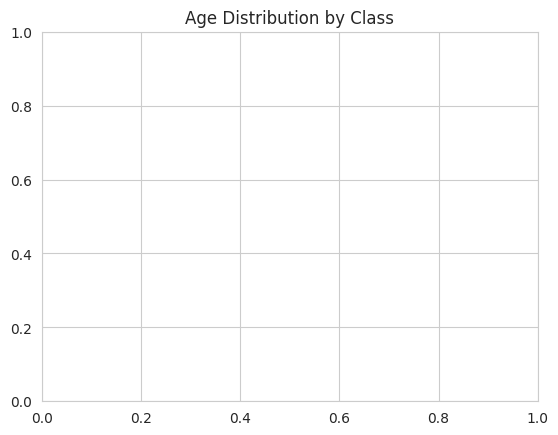

In [ ]:
# Visualization libraries
sns.set_style('whitegrid')

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

# Survival count
sns.countplot(x='Survived', data=data, palette='Set2')
plt.title('Survival Count')
plt.show()

# Age distribution
sns.histplot(data['Age'], kde=True, color='coral')
plt.title('Age Distribution')
plt.show()

# Survival by Age Group
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 100])
sns.countplot(x='AgeGroup', hue='Survived', data=data, palette='Set1')
plt.xticks(rotation=45)
plt.title('Survival by Age Group')
plt.show()

# Boxplot for Age by Class
sns.boxplot(x='Pclass', y='Age', data=data, palette='rainbow')
plt.title('Age Distribution by Class')
plt.show()


In [ ]:
from scipy.stats import chi2_contingency

# Creating a contingency table
contingency_table = pd.crosstab(data['Survived'], data['Sex'])

# Chi-Square test
chi2, p, dof, ex = chi2_contingency(contingency_table)
print("Chi-Square Test p-value:", p)

# Check if p < 0.05 for significance
if p < 0.05:
    print("Sex and Survived are dependent (statistically significant).")
else:
    print("Sex and Survived are independent (not statistically significant).")


ValueError: No data; `observed` has size 0.

In [ ]:
# Split the data into training and testing sets (70-30 split)
X = data[['Pclass', 'Age', 'Sex', 'SibSp', 'Parch']]
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)


In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Accuracy and confusion matrix
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_predictions))


Decision Tree Accuracy: 0.7534883720930232
Confusion Matrix:
 [[103  14]
 [ 39  59]]


In [ ]:
# Naïve Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

# Accuracy and confusion matrix
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naïve Bayes Accuracy:", nb_accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_predictions))


Naïve Bayes Accuracy: 0.7813953488372093
Confusion Matrix:
 [[97 20]
 [27 71]]


In [ ]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=9)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# Accuracy and confusion matrix
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_predictions))


KNN Accuracy: 0.7023255813953488
Confusion Matrix:
 [[106  11]
 [ 53  45]]


In [ ]:
print("Model Comparison:")
print(f"Decision Tree Accuracy: {dt_accuracy * 100:.2f}%")
print(f"Naïve Bayes Accuracy: {nb_accuracy * 100:.2f}%")
print(f"KNN Accuracy: {knn_accuracy * 100:.2f}%")

# Identify the best model
best_model = max(dt_accuracy, nb_accuracy, knn_accuracy)
if best_model == dt_accuracy:
    print("The best model is: Decision Tree")
elif best_model == nb_accuracy:
    print("The best model is: Naïve Bayes")
else:
    print("The best model is: KNN")


Model Comparison:
Decision Tree Accuracy: 75.35%
Naïve Bayes Accuracy: 78.14%
KNN Accuracy: 70.23%
The best model is: Naïve Bayes
